## Simple Perceptron Part 2 - Animation

Will Russell




### Overview

- This notebook serves to provide a glimpse into what is occurring **during the training** of a given perceptron on a dataset. The parameters are easily modified, and the methods guiding the functions are found in the project_code module. 
- We wanted to provide this as a means of visualizing what we talk about in the report regarding the modification of alpha values and the impact of soft vs hard activation functions on the delineation of the classification line. 
- As with all Jupyter Notebooks, care must be taken in execution of the cells to ensure that the associated variables have been set, as the application follows a serial execution pattern.
- The number of iterations and the desired alpha value can be set at the top of each block
- The animation should run for the number of iterations specified. 
    - *NOTE: The animation is a bit expensive and will sometimes get blocked if too many graphs are executed simultaneously*
- The data points displayed are those used to train the model, this is in contrast to the graphing in **project2_plotting.ipynb** which shows the data points used for testing (unless the train/test ratio == 1.0)



### Imports / Set Globals

In [1]:
from project_code.fileWorker import retrieve_students
import random
import numpy as np
import matplotlib.pyplot as plt
from project_code.data import normalize_student_data, separate_normalized_students, separate_and_normalize_students, train_set, split_set, tecalc
from project_code.perceptron import Perceptron
from project_code.graphlib import plot_normalized_data, plot_animated_data

%matplotlib notebook

# Retrieve the student data from a file
students = retrieve_students('./data.txt')
# Generate a normalized list of student data
student_list = normalize_student_data(students)

## 1 Dimensional Display: Height Only

### Summary
- The following sections enable the user to create perceptron models based on the height of students and view the convergence to a final point of error

In [2]:
student_height_list = [[x[0],x[2]] for x in student_list]
student_train = random.sample(student_height_list, 2000)

dimensions = 1
weights = [random.random() for i in range(dimensions+1)]
male_students, female_students = separate_normalized_students(student_train,gender_idx=dimensions)

<IPython.core.display.Javascript object>


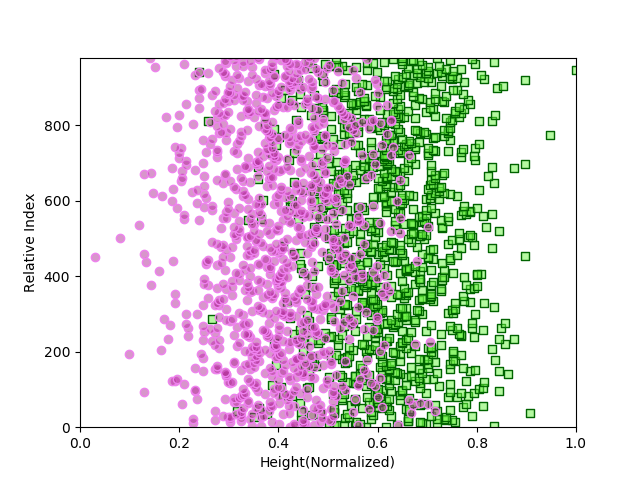

In [3]:
iterations = 1000
alpha = 0.5
p = Perceptron(ite=iterations, alpha=alpha)
hard_results = p.train(student_train, weights=weights, activation="hard")
fig4 = plt.figure("1 Dimension: Height Only, Hard Activation, Alpha={}".format(alpha))
anim = plot_animated_data(fig4, male_students, female_students, hard_results,dimensions, iterations)
plt.show()


<IPython.core.display.Javascript object>


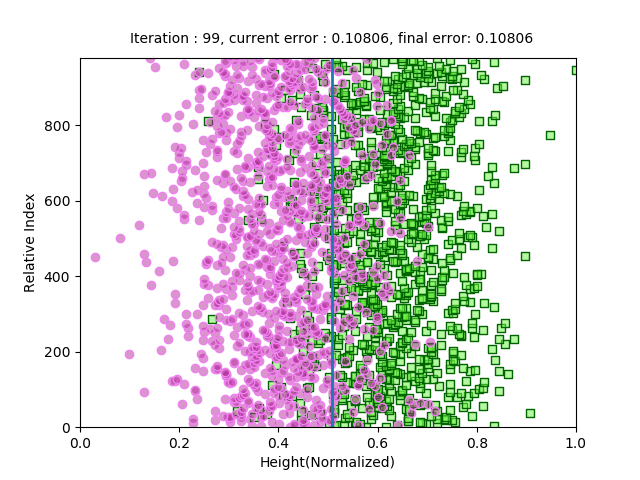

In [4]:
iterations = 100
alpha = 0.01
p = Perceptron(ite=iterations, alpha=alpha)
soft_results = p.train(student_train, weights=weights, activation="soft")
fig5 = plt.figure("1 Dimension: Soft Activation, Alpha={}".format(alpha))
anim = plot_animated_data(fig5, male_students, female_students, soft_results,dimensions, iterations)
plt.show()


## 2 Dimensions: Height and Weight

### Summary
- The following sections enable the user to create perceptron models based on the height and weight of students and view the convergence of the model to a final error ratio.

In [5]:
student_train = random.sample(student_list, 2000)
dimensions = 2
weights = [random.random() for i in range(dimensions+1)]
male_students, female_students = separate_normalized_students(student_train,gender_idx=dimensions)

<IPython.core.display.Javascript object>


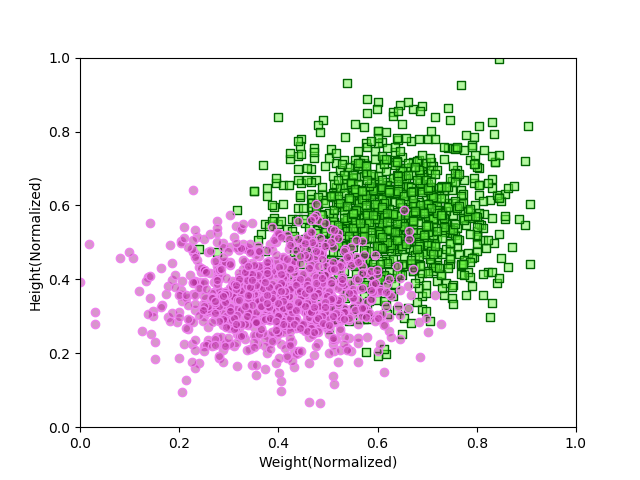

In [6]:
iterations = 1000
alpha = 0.5
p = Perceptron(ite=iterations, alpha=alpha)
hard_results = p.train(student_train, weights=weights, activation="hard")
fig5 = plt.figure("2 Dimensions: Height x Weight, Hard Activation, Alpha={}".format(alpha))
anim = plot_animated_data(fig5, male_students, female_students, hard_results,dimensions, iterations)
plt.show()

<IPython.core.display.Javascript object>


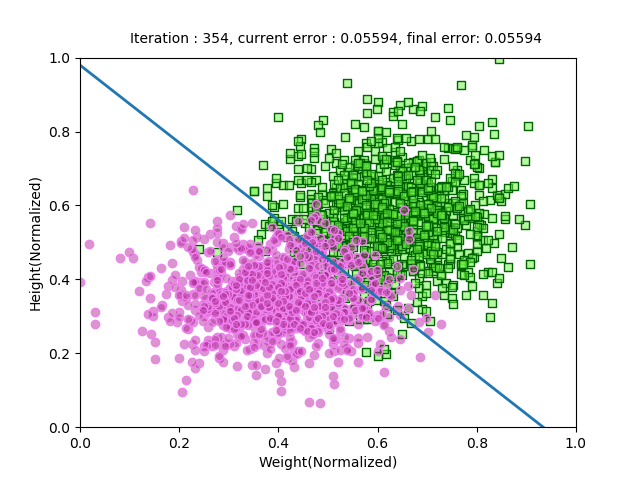

In [9]:
iterations = 1000
alpha = 0.01
p = Perceptron(ite=iterations, alpha=alpha)
soft_results = p.train(student_train, weights=weights, activation="soft")
fig5 = plt.figure("2 Dimensions: Height x Weight, Soft Activation, Alpha={}".format(alpha))
anim = plot_animated_data(fig5, male_students, female_students, soft_results,dimensions, iterations)
plt.show()